In [2]:
import numpy as np
from PIL import Image
import cv2 as cv
import os
import matplotlib.pyplot as plt

%matplotlib inline

## PIL로 불러오기

In [18]:
path = './data/train/10000.png'
image_pil = Image.open(path)
image = np.array(image_pil)

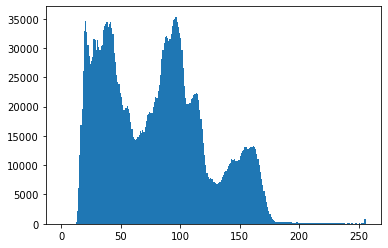

In [20]:
image.shape

#이미지 range 확인
np.min(image), np.max(image)


#이미지 시각화
plt.hist(image.ravel(),256,[0,256])
plt.show()

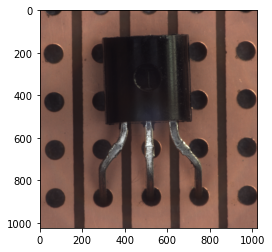

In [21]:
plt.imshow(image)
plt.show()

## CV로 불러오기 : 실패?

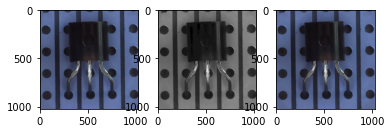

In [24]:
figure = plt.figure()
ax = []

for i in range(3):
    ax.append(figure.add_subplot(1,3,i+1))

color_img = cv.imread('./data/train/10000.png', cv.IMREAD_COLOR)
gray_img = cv.imread('./data/train/10000.png', cv.IMREAD_GRAYSCALE)
unch_img = cv.imread('./data/train/10000.png', cv.IMREAD_UNCHANGED)

ax[0].imshow(color_img, 'gray')
ax[1].imshow(gray_img, 'gray')
ax[2].imshow(unch_img)


## 0. train 폴더 복사하기

In [31]:
import shutil
shutil.copytree("./data/train", "./data/train_ex")

## 1. label 별 폴더만들기

In [5]:
import pandas as pd

train_df = pd.read_csv("./data/train_df.csv")
print(len(train_df["label"].unique()))  # type = numpy.array
label_list = train_df["label"].unique().tolist()
len(label_list)  # type = list

88


88

In [32]:
import os

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)
 
for i in range(len(label_list)):  # 레이블 개수 만큼 
    createFolder(f'./data/train_ex/{label_list[i]}')  # 레이블 폴더를 생성 

## 2. 이미지 파일을 레이블에 맞게 각 폴더로 옮기기

In [7]:
display(train_df)

,index,file_name,class,state,label
0,0,10000.png,transistor,good,transistor-good
1,1,10001.png,capsule,good,capsule-good
2,2,10002.png,transistor,good,transistor-good
3,3,10003.png,wood,good,wood-good
4,4,10004.png,bottle,good,bottle-good
...,...,...,...,...,...
4272,4272,14272.png,transistor,good,transistor-good
4273,4273,14273.png,transistor,good,transistor-good
4274,4274,14274.png,grid,good,grid-good
4275,4275,14275.png,zipper,good,zipper-good


In [3]:
train_folder = os.listdir('./data/train_ex/')
len(train_folder)  # -폴더개수 88 , 사진개수 = 4277개, 총 4365

4365

In [15]:
for i in range(len(train_folder)):  # 폴더 생성한것 88개 뺴주는 겁니다.
    
    if train_folder[i][-3:] == "png":   # 확장자가 png면 
#         print(train_df.loc[train_df["file_name"] == f"{train_folder[i]}"].iloc[0]["label"])
        label = train_df.loc[train_df["file_name"] == f"{train_folder[i]}"].iloc[0]["label"]  # train_df에서 이미지 이름에 맞는 label을 불러와 저장
        file_source = f'./data/train_ex/{train_folder[i]}'  # train 폴더에 있는 해당 이미지를
        file_destination = f'./data/train_ex/{label}/'  # 해당 label 폴더로 이동 
        shutil.move(file_source, file_destination)  # 이동 실행

In [16]:
train_folder = os.listdir('./data/train_ex/')
len(train_folder)  # -폴더개수 88 , 사진개수 = 4277개, 총 4365

88

## 정규화 과정